# Submitted by:
 
* Sella Sharlin
* Raz Doitch

## To be submitted by: 20.2.2022

## Titanic survival prediction



In this part we will attempt to predict who survived on the Titanic. The data set we use has the following vairbales (features/attributes):


|  Variable   |          Definition          |              Key/Values                 |
|:-----------:|:----------------------------:|:---------------------------------------:|
| PassengerId | Index                        |integer                                  |
| Pclass      | Ticket class                 |1=1st, 2=2nd, 3=3rd                      |
| Name        | Name of passenger            |string                                   |
| Sex         | Sex                          |male, female                             |
| Age         | Age in years                 |integer                                  |
| SibSp       | # of siblings/spouses aboard |integer                                  |
| Parch       | # of parents/children aboard |integer                                  |
| Ticket      | Ticket number                |string                                   |
| Fare        | Ticket fare                  |float                                    |
| Cabin       | Cabin number                 |a code                                   |
| Embarked    | Port of Embarkation          |C=Cherbourg, Q=Queenstown, S=Southampton |
| **Survived**| Predicted varibale           |0=No, 1=Yes                              |


**Goal:**

This part of the project is a competetive one. The goal is to produce the best prediciton you can
<br><br>


**Methodogology**

So far you only know few methods for classification: KNN, logistic regression and SVM. You can use each one of them. You can also use linear regression, but then you need to convert the output to 0s and 1s (this is not a straight forward use of linear regression but a possible one). You may want to choose which features to use (it could be that some features are not useful). Further, some features have missing values. You will need to decide how to handle this (for instance: drop rows with missing values, place an avergae value in those rows, or some other method of your choosing). Another matter to consider is handling non-numeric values. For example, sex is non-numeric. You may choose to drop non-numeric features, or you could convert them to numeric values (if such conversion makes sense).
Also you will need to consider splitting the data into a training set and a test set so as to avoid tailoring the solution (overfitting) to the data you have.
<br><br>
Bottom line: use everything we talked about in class in order to learn the best model.


**Model Output**

Your model needs to produce a prediciton for each data sample (row), which is 0 (did not survive) or 1 (survived). 
<br><br>

**Scoring your model**

Your model performance will be assessed on test data that is not available to you. As mentioned above, this part of the project is a competition, where the goal is to achieve highest model accuracy

<br><br>
**Final Note**

This part of the project is open ended, in that you are not given small and specific tasks. However, you are already familiar with all the components needed to succeed. Specifically, reading data into pandas dataframe, dropping columns, dropping rows, changing value of features, splitting data into train and test subsets, performing model using sklearn library, and using cross validation. So don't panic...


GOOD LUCK

## Solution
We will implement a model that will predict survival on the Titanic by the next steps:
1. Adding Data 
2. Exploratory Data Analysis 
3. Data Preparation  
5. Implementing Models
6. Testing
<br><br>

### 1. Adding Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score
import statistics 
from IPython.display import Image
import warnings

In [2]:
# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
# generating data
titanic_data = pd.read_csv('titanic_train.csv')

# droping irrelevant columns
irrelevant_cols = ['PassengerId', 'Ticket']  
titanic_data = titanic_data.drop(irrelevant_cols, axis=1)

### 2. Exploratory Data Analysis 

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       569 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Cabin     163 non-null    object 
 8   Embarked  710 non-null    object 
 9   Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 55.8+ KB


In [5]:
titanic_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,569.000000,712.000000,712.000000,712.000000,712.000000
mean,2.306180,30.017873,0.492978,0.363764,32.183227,0.383427
std,0.837964,14.556518,1.121309,0.745153,48.431211,0.486563
min,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.200000,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000


In [6]:
import seaborn as sns
sns.set() # setting seaborn default for plots

# creating bar chart function for categorical features
def bar_chart(feature):
    survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    dead = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

**Sex**

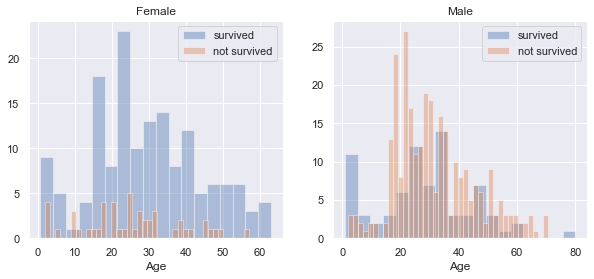

In [7]:
# showing plot for survivel chance by sex 
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_data[titanic_data['Sex']=='female']
men = titanic_data[titanic_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Conclution: We can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

**Pclass**

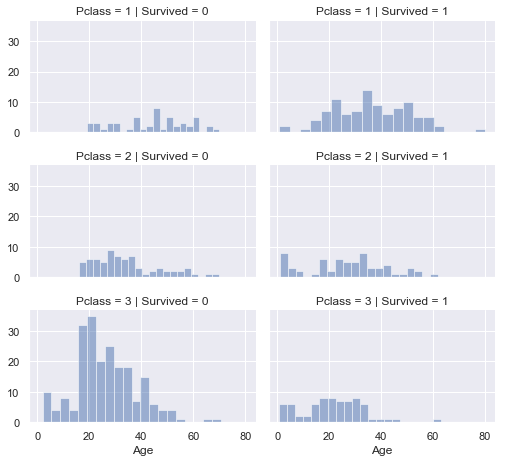

In [8]:
# showing plot for survivel chance by Pclass 
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

Conclusions: According to the chart, we can see that 1st class more likely survivied than other classes, especially the 3rd class that more likely dead.

**SibSp**

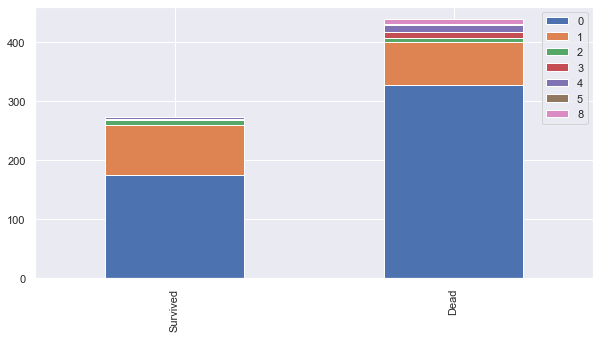

In [9]:
bar_chart('SibSp')

Conclusions: The Chart shows that a person aboarded with more than 2 siblings or spouse more likely survived and a person aboarded without siblings or spouse more likely dead.

**Parch**

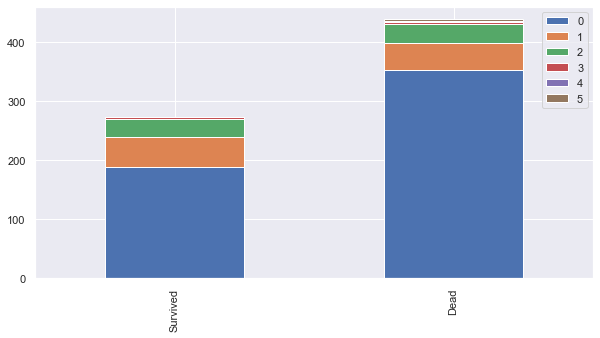

In [10]:
bar_chart('Parch')

Conclusions: The chart shows that a person aboarded with more than 2 parents or children more likely survived and a person aboarded alone more likely dead.

**Embarked**

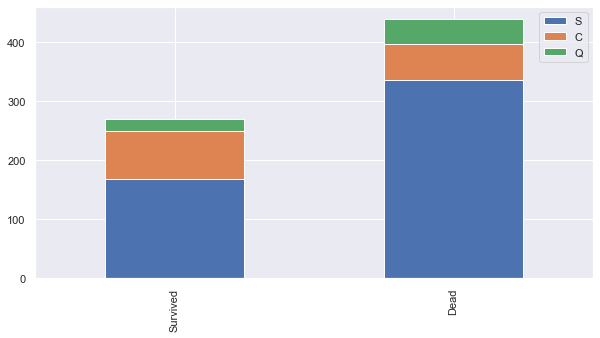

In [11]:
bar_chart('Embarked')

Conclusions: The chart shows that a person aboarded from C slightly more likely survived, a person aboarded from Q more likely dead and a person aboarded from S more likely dead.

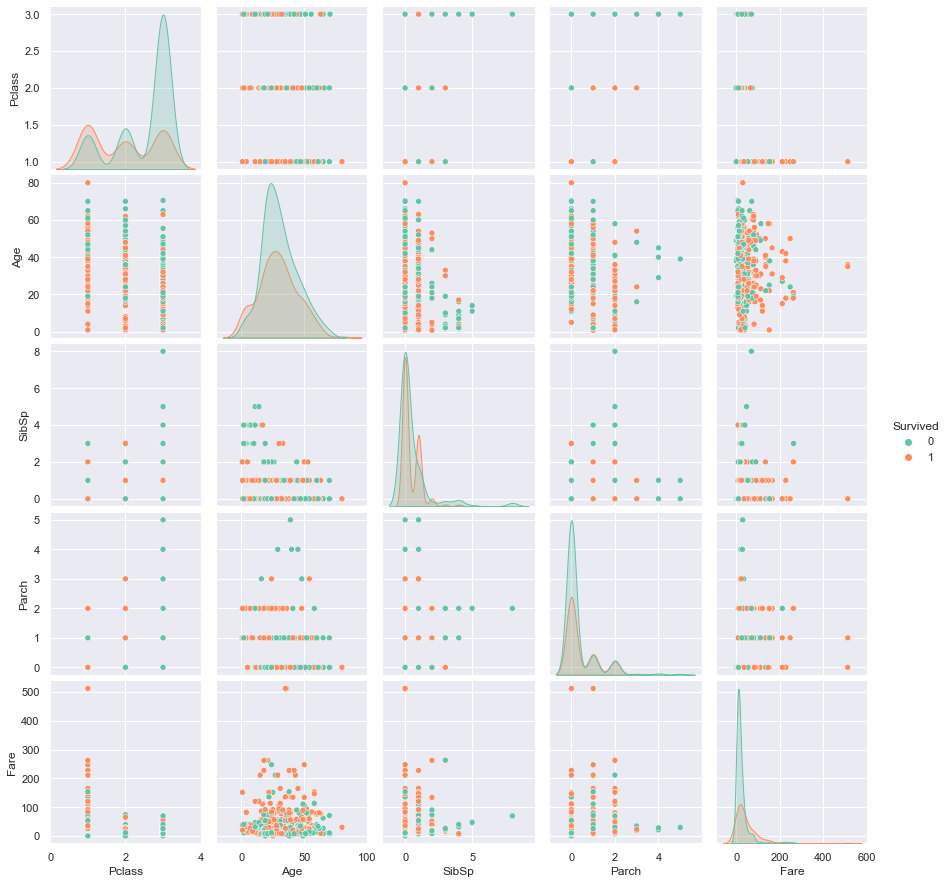

In [12]:
# exploration all the relation between pairs of variables in order to have a better understanding
sns.pairplot(titanic_data, height=2.5, hue = "Survived", palette = "Set2")   
plt.show()

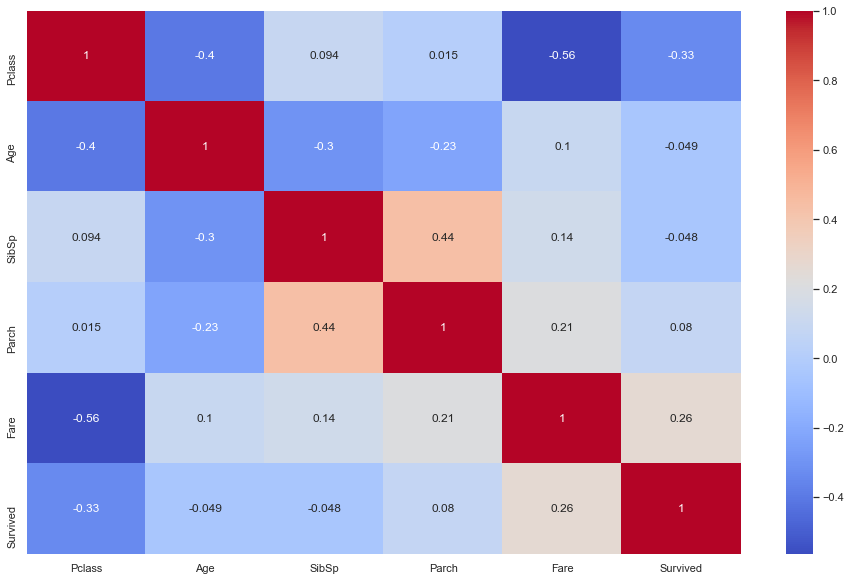

In [13]:
# exploring correlation with heatmap
plt.figure(figsize=(16,10))
sns.heatmap(titanic_data.corr(), cmap="coolwarm", annot=True) 
plt.show()

### 3. Data Preparation  

**Feature: name**

Using the information about the status of each passenger from the column 'Name'.


In [14]:
# copying the column 'Name' into title and then subsetting only the relevant information
titanic_data['Title'] = titanic_data['Name'].copy()
titanic_data['Title'] = (titanic_data['Title'].str.split(', ')).str[1]
titanic_data['Title'] = titanic_data['Title'].str.split('.').str[0]

# Checking the occurence of each title to see which is really relevant
title_occurences = titanic_data.groupby(by='Title').size().sort_values(ascending=False)
print(title_occurences)

# splitting the titles into groups (the 4 most common alone and the others will be gathered into one group - other)
title_occurences = titanic_data.groupby(by='Title').size().sort_values(ascending=False)
titles = [key for key in title_occurences.keys()]
titles_to_replace = titles[4:]
other_list = ['other'] * len(titles_to_replace)
titanic_data['Title'] = titanic_data['Title'].replace(titles_to_replace, other_list)
dummies_title = pd.get_dummies(titanic_data.Title, prefix='Title')
titanic_data = pd.concat([titanic_data, dummies_title], axis=1)


Title
Mr              419
Miss            142
Mrs              93
Master           32
Dr                6
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
dtype: int64


**Feature: sex**

Convert sex to binary:

male 0, female 1

In [15]:
sex = ['male', 'female']
encoder1 = preprocessing.LabelEncoder()
encoder1.fit(sex)
encoder1.classes_ = np.array(sex)
titanic_data['Sex'] = encoder1.transform(titanic_data['Sex'])
titanic_data['Sex'].astype(int)

0      0
1      1
2      0
3      0
4      1
      ..
707    0
708    0
709    1
710    1
711    0
Name: Sex, Length: 712, dtype: int64

**Feature: age**

Replacing NA values with the mean age.

In [16]:
mean_age = int(titanic_data.Age.mean())
titanic_data['Age'].fillna(mean_age, inplace=True)

**Feature: embarked**

Because we discovered that more than 50% of 1st, 2nd and 3rd of each class are from S embark we decided to fill out missing values in embark with S embark.

In [17]:
# filling NA's of 'Embarked' with most recurring values (mode)
mode_embarked = titanic_data.Embarked.mode()[0]
titanic_data['Embarked'].fillna(mode_embarked, inplace=True)

# encoding column 'Embarked' into three 'One hot encoded' columns
dummies_emb = pd.get_dummies(titanic_data.Embarked, prefix='Embarked')
titanic_data = pd.concat([titanic_data, dummies_emb], axis=1)

**Feature: fare**

Filling missing fare values with median fare for each Pclass.

In [18]:
# fill missing Fare with median fare for each Pclass
titanic_data["Fare"].fillna(titanic_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
titanic_data['Fare'] = titanic_data['Fare'].fillna(0)
titanic_data['Fare'] = titanic_data['Fare'].astype(int)

**Feature: deck**

we found out that the letter in the values of column 'Cabin' represent the level of deck where the cabin is (as the picture below).

In [19]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png")

In [20]:
# First we are going to create a copy of 'Cabin' and subsetting the letter of it
titanic_data['Deck'] = titanic_data['Cabin'].copy()
titanic_data['Deck'] = titanic_data['Deck'].str[0]

# Filling NA's with 0
titanic_data['Deck'].fillna('0', inplace=True)

# Retrieving the unique values of deck and encoding it (0,8) - where the higher we get, the lower we are on the boat
decks = sorted(titanic_data['Deck'].unique())
encoder2 = preprocessing.LabelEncoder()
encoder2.fit(decks)
encoder2.classes_ = np.array(decks)
titanic_data['Deck'] = encoder2.transform(titanic_data['Deck'])
titanic_data['Deck'].astype(int)


0      0
1      4
2      0
3      0
4      0
      ..
707    0
708    0
709    0
710    3
711    0
Name: Deck, Length: 712, dtype: int64

### Creating new Features

**1. Relatives**

Creating new feature of total number of family members (siblings, spouses, parents, children) aboard.

In [21]:
titanic_data['Relatives'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data.loc[titanic_data['Relatives'] > 0, 'Not_alone'] = 0
titanic_data.loc[titanic_data['Relatives'] == 0, 'Not_alone'] = 1
titanic_data['Not_alone'] = titanic_data['Not_alone'].astype(int)

**2. Age times Class**

In [22]:
titanic_data['Age_Class']= titanic_data['Age'] * titanic_data['Pclass']

**3. Fare per Person**

In [23]:
titanic_data['Fare_Per_Person'] = titanic_data['Fare']/(titanic_data['Relatives']+1)
titanic_data['Fare_Per_Person'] = titanic_data['Fare_Per_Person'].astype(int)

In [24]:
# Dropping irrelevant columns
titanic_data.drop(['Embarked','Cabin', 'Name', 'Title'], axis=1, inplace=True)

In [25]:
titanic_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other,Embarked_C,Embarked_Q,Embarked_S,Deck,Relatives,Not_alone,Age_Class,Fare_Per_Person
0,2,0,43.0,1,1,26,0,0,0,1,0,0,0,0,1,0,2,0,86.0,8
1,2,1,36.0,0,0,13,1,0,0,0,1,0,0,0,1,4,0,1,72.0,13
2,3,0,30.0,0,0,7,0,0,0,1,0,0,0,0,1,0,0,1,90.0,7
3,3,0,22.0,0,0,7,0,0,0,1,0,0,0,0,1,0,0,1,66.0,7
4,3,1,35.0,1,1,20,1,0,0,0,1,0,0,0,1,0,2,0,105.0,6
5,3,0,30.0,0,0,9,0,0,0,1,0,0,0,0,1,0,0,1,90.0,9
6,3,0,30.0,0,0,7,1,0,0,1,0,0,0,0,1,0,0,1,90.0,7
7,3,0,26.0,0,0,7,0,0,0,1,0,0,0,0,1,0,0,1,78.0,7
8,1,1,23.0,1,0,113,1,0,1,0,0,0,1,0,0,4,1,0,23.0,56
9,1,1,52.0,1,1,93,1,0,0,0,1,0,0,0,1,2,2,0,52.0,31


### 4. Implementing Models

In [26]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score 
import matplotlib.pyplot as plt

In [27]:
# spliting data to test and training data
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Base line model

**Baseline for knn:**

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)       
print("KNN accuracy score: %.4f" % accuracy)

KNN accuracy score: 0.7622


**Baseline for logistic regression:**

In [29]:
## baseline for logistic regression 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_ = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_)       
print("Logistic Regression accuracy score: %.4f" % acc_log)

Logistic Regression accuracy score: 0.8671


**Baseline for SVM:**

In [30]:
## baseline for SVM
reg_svc = SVC()
reg_svc.fit(X_train, y_train)

Y_predict = reg_svc.predict(X_test)

acc_svc1 = accuracy_score(y_test, Y_predict)       
print("SVM accuracy score: %.4f" % acc_svc1)

SVM accuracy score: 0.7273


**Baseline for linear regression:**

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

ypred = lin_reg.predict(X_test)
ypred_rounded = np.where(ypred > 1, 1, np.where(ypred < 0, 0, np.round(ypred)))
        
print("MSE = %.4f" % mean_squared_error(y_test, ypred_rounded))

total = X_test.shape[0]
correct = np.sum(y_test == ypred_rounded)
print("Linear Regression accuracy of prediction is: %.3f" % (correct/total))

MSE = 0.1399
Linear Regression accuracy of prediction is: 0.860


### Trainning models

In [32]:
# scaling data (z-score method)
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X_train)
Xtrain_scaled = standard_scaler.transform(X_train)
Xtest_scaled = standard_scaler.transform(X_test)

# scaling data (min-max method)
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
minmax_scaler.fit(X_train)
Xtrain_minmax = minmax_scaler.transform(X_train)
Xtest_minmax = minmax_scaler.transform(X_test)


**Model: KNN**

In [33]:
# standard scaler
knn1 = KNeighborsClassifier()
knn1.fit(Xtrain_scaled, y_train)
y_pred1 = knn1.predict(Xtest_scaled)
accuracy1 = accuracy_score(y_test, y_pred1)

print("In the test set result for standard scaler, the accuracy score is %.4f" % accuracy1)

# min-max scaler
knn2 = KNeighborsClassifier()
knn2.fit(Xtrain_minmax, y_train)
y_pred2 = knn2.predict(Xtest_minmax)
accuracy2 = accuracy_score(y_test, y_pred2)

print("In the test set result for min-max scaler, the accuracy score is %.4f" % accuracy2)

In the test set result for standard scaler, the accuracy score is 0.8601
In the test set result for min-max scaler, the accuracy score is 0.8811


In [34]:
param_grid = {'n_neighbors': np.arange(1, 35), 'p': np.arange(1,2)}

# finding the best number of neighbors for standard scaling
knn3 = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn3, param_grid, cv=8)
knn_gscv.fit(Xtrain_scaled, y_train)
print("For standard scaling, the best number of neighbors is %d" % knn_gscv.best_params_['n_neighbors'], 
      "and best p=%d" %knn_gscv.best_params_['p'], "with a score of %.3f" % knn_gscv.best_score_)

# finding the best number of neighbors for min-max scaling
knn4 = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn4, param_grid, cv=8)
knn_gscv2.fit(Xtrain_minmax, y_train)
print("\nFor minmax scaling, the best number of neighbors is %d" % knn_gscv2.best_params_['n_neighbors'], 
      "and best p=%d" %knn_gscv2.best_params_['p'], "with a score of %.3f" % knn_gscv2.best_score_)

For standard scaling, the best number of neighbors is 17 and best p=1 with a score of 0.807

For minmax scaling, the best number of neighbors is 8 and best p=1 with a score of 0.807


The best number of neighbors we got with standard scaler method and min-max scaler method are unfortunately not  indeed the best parameters. Let's try it on the KNN model and look also for the values close to it in order to find the best fit.

In [35]:
# using the best number of neighbors = 17 
knn5 = KNeighborsClassifier(n_neighbors=10, p=2)
knn5.fit(Xtrain_scaled, y_train)
y_pred5 = knn5.predict(Xtest_scaled)
accuracy5 = accuracy_score(y_test, y_pred5)
 
print("In the test set result for standard scaler, the accuracy score is %.4f" % accuracy5)

# using the best number of neighbors = 7
knn6 = KNeighborsClassifier(n_neighbors=7, p=1)
knn6.fit(Xtrain_minmax, y_train)
y_pred6 = knn6.predict(Xtest_minmax)
accuracy6 = accuracy_score(y_test, y_pred6)
 
print("In the test set result for min-max scaler, the accuracy score is %.4f" % accuracy6)

In the test set result for standard scaler, the accuracy score is 0.8811
In the test set result for min-max scaler, the accuracy score is 0.8741


In [36]:
# using cross validation 
knn_cv = KNeighborsClassifier(n_neighbors=20, p=1)    
cv_scores = cross_val_score(knn_cv, Xtrain_scaled, y_train, cv=5)  

cv_scores_mean = statistics.mean(cv_scores)
all_scores_knn = [cv_scores_mean, accuracy5, accuracy6]
acc_knn = max(all_scores_knn)*100

print(cv_scores)
print('cv_scores mean: %.1f%%' % (100*np.mean(cv_scores)))
print ('cv_scores std: %.1f%%' % (100*np.std(cv_scores)))

[0.75438596 0.78947368 0.81578947 0.81578947 0.81415929]
cv_scores mean: 79.8%
cv_scores std: 2.4%


In [37]:
# performance measures  
knn_confusion_matrix = confusion_matrix(y_test, y_pred5)

knn_TP = knn_confusion_matrix[0,0]
knn_FN = knn_confusion_matrix[0,1]
knn_FP = knn_confusion_matrix[1,0]
knn_TN = knn_confusion_matrix[1,1]

knn_accuracy = (knn_TP + knn_TN) / (knn_FN + knn_FP + knn_TP + knn_TN)
print("Accuracy=", knn_accuracy)

knn_precision = knn_TP / (knn_TP + knn_FP)
print("Precision=", knn_precision)

knn_recall = knn_TP / (knn_TP + knn_FN)
print("Recall=", knn_recall)

knn_F1 = 2*knn_precision*knn_recall / (knn_precision + knn_recall)
print("F1 score=", knn_F1)

Accuracy= 0.8811188811188811
Precision= 0.8901098901098901
Recall= 0.9204545454545454
F1 score= 0.9050279329608938


**Model: SVM**

In [38]:
# standard scaler
svc1 = SVC()
svc1.fit(Xtrain_scaled, y_train)
y_pred_1 = svc1.predict(Xtest_scaled)
accuracy_1 = accuracy_score(y_test, y_pred_1)

print("In the test set result for standard scaler, the accuracy score is %.4f" % accuracy_1)

# min-max scaler
svc2 = SVC()
svc2.fit(Xtrain_minmax, y_train)
y_pred_2 = svc2.predict(Xtest_minmax)
accuracy_2 = accuracy_score(y_test, y_pred_2)
     
print("In the test set result for min-max scaler, the accuracy score is %.4f" % accuracy_2)

In the test set result for standard scaler, the accuracy score is 0.8671
In the test set result for min-max scaler, the accuracy score is 0.8462


In [39]:
# using cross validation 
svc_cv = SVC() 
cv_scores_svc = cross_val_score(svc_cv, Xtrain_scaled, y_train, cv=5)  

cv_scores_mean_ = statistics.mean(cv_scores_svc)
all_scores = [cv_scores_mean_, accuracy_1, accuracy_2]
acc_svc = max(all_scores)*100

print(cv_scores_svc)
print('cv_scores mean: %.1f%%' % (100*np.mean(cv_scores_svc)))
print ('cv_scores std: %.1f%%' % (100*np.std(cv_scores_svc)))

[0.78070175 0.75438596 0.80701754 0.81578947 0.84070796]
cv_scores mean: 80.0%
cv_scores std: 3.0%


In [40]:
# performance measures  
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_1)

SVM_TP = SVM_confusion_matrix[0,0]
SVM_FN = SVM_confusion_matrix[0,1]
SVM_FP = SVM_confusion_matrix[1,0]
SVM_TN = SVM_confusion_matrix[1,1]

SVM_accuracy = (SVM_TP + SVM_TN) / (SVM_FN + SVM_FP + SVM_TP + SVM_TN)
print("Accuracy=", SVM_accuracy)

SVM_precision = SVM_TP / (SVM_TP + SVM_FP)
print("Precision=", SVM_precision)

SVM_recall = SVM_TP / (SVM_TP + SVM_FN)
print("Recall=", SVM_recall)

SVM_F1 = 2*SVM_precision*SVM_recall / (SVM_precision + SVM_recall)
print("F1 score=", SVM_F1)

Accuracy= 0.8671328671328671
Precision= 0.8791208791208791
Recall= 0.9090909090909091
F1 score= 0.8938547486033518


**Model: Logistic Regression**

In [41]:
# standard scaler
log_reg1 = LogisticRegression()
log_reg1.fit(Xtrain_scaled, y_train)
y_pred11 = log_reg1.predict(Xtest_scaled)
accuracy11 = accuracy_score(y_test, y_pred11)

print("In the test set result for standard scaler, the accuracy score is %.4f" % accuracy11)

# min-max scaler
log_reg2 = LogisticRegression()
log_reg2.fit(Xtrain_minmax, y_train)
y_pred22 = log_reg2.predict(Xtest_minmax)
accuracy22 = accuracy_score(y_test, y_pred22)

print("In the test set result for min-max scaler, the accuracy score is %.4f" % accuracy22)

In the test set result for standard scaler, the accuracy score is 0.8741
In the test set result for min-max scaler, the accuracy score is 0.8741


In [42]:
# using cross validation 
log_reg_cv = LogisticRegression()
cv_scores_log_reg = cross_val_score(log_reg_cv, Xtrain_scaled, y_train, cv=5)  

cv_scores_mean_1 = statistics.mean(cv_scores_log_reg)
all_scores = [cv_scores_mean_1, accuracy11, accuracy22]
acc_log = max(all_scores)*100

print(cv_scores_svc)
print('cv_scores mean: %.1f%%' % (100*np.mean(cv_scores_log_reg)))
print ('cv_scores std: %.1f%%' % (100*np.std(cv_scores_log_reg)))

[0.78070175 0.75438596 0.80701754 0.81578947 0.84070796]
cv_scores mean: 80.7%
cv_scores std: 1.6%


In [43]:
# performance measures  
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred11)

log_reg_TP = log_reg_confusion_matrix[0,0]
log_reg_FN = log_reg_confusion_matrix[0,1]
log_reg_FP = log_reg_confusion_matrix[1,0]
log_reg_TN = log_reg_confusion_matrix[1,1]

log_reg_accuracy = (log_reg_TP + log_reg_TN) / (log_reg_FN + log_reg_FP + log_reg_TP + log_reg_TN)
print("Accuracy=", log_reg_accuracy)

log_reg_precision = log_reg_TP / (log_reg_TP + log_reg_FP)
print("Precision=", log_reg_precision)

log_reg_recall = log_reg_TP / (log_reg_TP + log_reg_FN)
print("Recall=", log_reg_recall)

log_reg_F1 = 2*log_reg_precision*log_reg_recall / (log_reg_precision + log_reg_recall)
print("F1 score=", log_reg_F1)

Accuracy= 0.8741258741258742
Precision= 0.8888888888888888
Recall= 0.9090909090909091
F1 score= 0.8988764044943819


**Model: Linear Regression**

In [44]:
# standard scaler
lin_reg1 = LinearRegression()
lin_reg1.fit(Xtrain_scaled, y_train)

ypred1 = lin_reg1.predict(Xtest_scaled)
ypred1_rounded = np.where(ypred1 > 1, 1, np.where(ypred1 < 0, 0, np.round(ypred1)))

print("With standard scaling:")
print("MSE = %.4f" % mean_squared_error(y_test, ypred1_rounded))
total1 = Xtest_scaled.shape[0]
correct1 = np.sum(y_test == ypred1_rounded)
print("Accuracy of prediction is: %.3f" % (correct1/total1))

# min-max scaler
lin_reg2 = LinearRegression()
lin_reg2.fit(Xtrain_minmax, y_train)

ypred2 = lin_reg2.predict(Xtest_minmax)
ypred2_rounded = np.where(ypred2 > 1, 1, np.where(ypred2 < 0, 0, np.round(ypred2)))

print("\nWith min-max scaling:")
print("MSE = %.4f" % mean_squared_error(y_test, ypred2_rounded))
total2 = Xtest_minmax.shape[0]
correct2 = np.sum(y_test == ypred2_rounded)
print("Accuracy of prediction is: %.3f" % (correct2/total2))

With standard scaling:
MSE = 0.1329
Accuracy of prediction is: 0.867

With min-max scaling:
MSE = 0.1329
Accuracy of prediction is: 0.867


In [45]:
# removing variables with the least influence on the target
Xtrain2 = X_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
Xtest2 = X_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

lin_reg3 = LinearRegression()
lin_reg3.fit(Xtrain2, y_train)
ypred3 = lin_reg3.predict(Xtest2)
ypred3_rounded = np.where(ypred3 > 1, 1, np.where(ypred3 < 0, 0, np.round(ypred3)))

print("MSE = %.4f" % mean_squared_error(y_test, ypred3_rounded))

total3 = Xtest2.shape[0]
correct3 = np.sum(y_test == ypred3_rounded)

log_reg_all_scores = [(correct3/total3), (correct2/total2), (correct1/total1)]
acc_reg = max(log_reg_all_scores)*100

print("Accuracy of prediction is: %.3f" % (correct3/total3))

MSE = 0.1329
Accuracy of prediction is: 0.867


In [46]:
# performance measures  
lin_reg_confusion_matrix = confusion_matrix(y_test, ypred3_rounded)

lin_reg_TP = lin_reg_confusion_matrix[0,0]
lin_reg_FN = lin_reg_confusion_matrix[0,1]
lin_reg_FP = lin_reg_confusion_matrix[1,0]
lin_reg_TN = lin_reg_confusion_matrix[1,1]

lin_reg_accuracy = (lin_reg_TP + lin_reg_TN) / (lin_reg_FN + lin_reg_FP + lin_reg_TP + lin_reg_TN)
print("Accuracy=", lin_reg_accuracy)

lin_reg_precision = lin_reg_TP / (lin_reg_TP + lin_reg_FP)
print("Precision=", lin_reg_precision)

lin_reg_recall = lin_reg_TP / (lin_reg_TP + lin_reg_FN)
print("Recall=", lin_reg_recall)

lin_reg_F1 = 2*lin_reg_precision*lin_reg_recall / (lin_reg_precision + lin_reg_recall)
print("F1 score=", lin_reg_F1)

Accuracy= 0.8671328671328671
Precision= 0.8791208791208791
Recall= 0.9090909090909091
F1 score= 0.8938547486033518


**Results**

In [47]:
performance_measures  = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Linear Regression'],
    'Accuracy': [SVM_accuracy, knn_accuracy, log_reg_accuracy, lin_reg_accuracy],
    'Precision':[SVM_precision, knn_precision, log_reg_precision, lin_reg_precision],
    'Recall':[SVM_recall, knn_recall, log_reg_recall, lin_reg_recall],
    'F1 score':[SVM_F1, knn_F1, log_reg_F1, lin_reg_F1]})
performance_measures_df = performance_measures.sort_values(by='Accuracy', ascending=False)
performance_measures_df = performance_measures_df.set_index('Model')
performance_measures_df.head()

,Accuracy,Precision,Recall,F1 score
Model,,,,
KNN,0.881119,0.890110,0.920455,0.905028
Logistic Regression,0.874126,0.888889,0.909091,0.898876
Support Vector Machines,0.867133,0.879121,0.909091,0.893855
Linear Regression,0.867133,0.879121,0.909091,0.893855


roc_auc_score for k-NN:  0.8693181818181819
roc_auc_score for SVM:  0.8545454545454545
roc_auc_score for Logistic Regression:  0.8636363636363636
roc_auc_score for Linear Regression:  0.8545454545454545


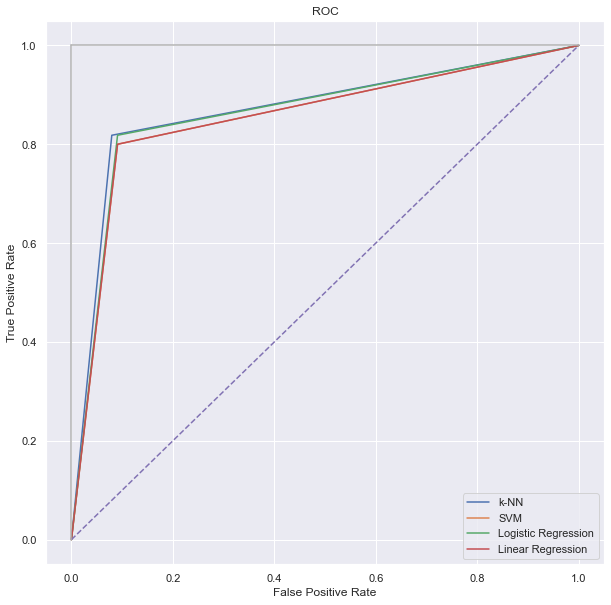

In [49]:
# ROC curve
false_positive_rate_knn, true_positive_rate_knn, threshold_knn= roc_curve(y_test, y_pred5)
print('roc_auc_score for k-NN: ', roc_auc_score(y_test, y_pred5))


false_positive_rate_SVM, true_positive_rate_SVM, threshold_SVM = roc_curve(y_test, y_pred_1)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_1))

false_positive_rate_log_reg, true_positive_rate_log_reg, threshold_log_reg = roc_curve(y_test, y_pred11)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred11))

false_positive_rate_lin_reg, true_positive_rate_lin_reg, threshold_lin_reg = roc_curve(y_test, ypred3_rounded)
print('roc_auc_score for Linear Regression: ', roc_auc_score(y_test, ypred3_rounded))


plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate_knn, true_positive_rate_knn)
plt.plot(false_positive_rate_SVM, true_positive_rate_SVM)
plt.plot(false_positive_rate_log_reg, true_positive_rate_log_reg)
plt.plot(false_positive_rate_lin_reg, true_positive_rate_lin_reg)
plt.legend(['k-NN','SVM','Logistic Regression','Linear Regression'])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Conclusion**

We reached the highest accuracy using the KNN model with a standard scaling method with a number of neighbors = 10 and p = 2. 
Looking at all the measurement metrics, precision can be seen as a measure of quality, and recall as a measure of quantity. 

Since in this case, it is more important for us to predict all surviving people, even if we were wrong, and predict people that didn't survive as survived. For that reason, we decided to focus on the recall metric. Looking at the table that compares the models it can be seen that the recall score of the KNN model is also the highest

Furthermore, the plot above compares the ROC curve of each model. As we can see, the models behave quite the same - predict beyond random with a slight advantage to the KNN model.

For all those reason we so chose the KNN model.

### 5. Testing

In order to make predictions on new data , we will first do the pre-processing we did above and then use our current file as our training data, and the test run on the new data (also after the same pre-processing we use on the training data will be done).
In order to examine the model performance on a test dataset, please enter the file name in the appropriate place after the next function.

In the end, we will get a result of all the models for general comparison, but we will focus on the results of the KNN model because this is the model we chose for the purpose of the task.

In [50]:
def test_file_transformation(test_file_name):

    df = pd.read_csv(test_file_name, header=0)
    titanic_test = df.copy()
    irrelevant_cols = ['PassengerId', 'Ticket']   # dropping those columns because irrelevant for evaluation of data
    titanic_test = titanic_test.drop(irrelevant_cols, axis=1)
    titanic_test['Title'] = titanic_test['Name'].copy()
    titanic_test['Title'] = (titanic_test['Title'].str.split(', ')).str[1]
    titanic_test['Title'] = titanic_test['Title'].str.split('.').str[0]

    # Title Column
    title_occurences = titanic_test.groupby(by='Title').size().sort_values(ascending=False)
    titles = [key for key in title_occurences.keys()]
    titles_to_replace = titles[4:]
    other_list = ['other'] * len(titles_to_replace)
    titanic_test['Title'] = titanic_test['Title'].replace(titles_to_replace, other_list)
    dummies_title = pd.get_dummies(titanic_test.Title, prefix='Title')
    titanic_test = pd.concat([titanic_test, dummies_title], axis=1)
    
    # Sex Column 
    sex = ['male', 'female']
    encoder1 = preprocessing.LabelEncoder()
    encoder1.fit(sex)
    encoder1.classes_ = np.array(sex)
    titanic_test['Sex'] = encoder1.transform(titanic_test['Sex'])
    titanic_test['Sex'].astype(int)
    
    # Age Column
    mean_age = int(titanic_test.Age.mean())
    titanic_test['Age'].fillna(mean_age, inplace=True)
    
    
    # Embarked Column
    mode_embarked = titanic_test.Embarked.mode()[0]
    titanic_test['Embarked'].fillna(mode_embarked, inplace=True)
    dummies_emb = pd.get_dummies(titanic_test.Embarked, prefix='Embarked')
    titanic_test = pd.concat([titanic_test, dummies_emb], axis=1)
    
    # Fare Column
    titanic_test["Fare"].fillna(titanic_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
    titanic_test['Fare'] = titanic_test['Fare'].fillna(0)
    titanic_test['Fare'] = titanic_test['Fare'].astype(int)

    # Deck Column
    titanic_test['Deck'] = titanic_test['Cabin'].copy()
    titanic_test['Deck'] = titanic_test['Deck'].str[0]

    titanic_test['Deck'].fillna('0', inplace=True)

    decks = sorted(titanic_test['Deck'].unique())
    encoder2 = preprocessing.LabelEncoder()
    encoder2.fit(decks)
    encoder2.classes_ = np.array(decks)
    titanic_test['Deck'] = encoder2.transform(titanic_test['Deck'])
    titanic_test['Deck'].astype(int)

    # Relatives Column
    titanic_test['Relatives'] = titanic_test['SibSp'] + titanic_test['Parch']
    titanic_test.loc[titanic_test['Relatives'] > 0, 'Not_alone'] = 0
    titanic_test.loc[titanic_test['Relatives'] == 0, 'Not_alone'] = 1
    titanic_test['Not_alone'] = titanic_test['Not_alone'].astype(int)
    
    # Age times Class
    titanic_test['Age_Class']= titanic_test['Age'] * titanic_test['Pclass']
    
    # Fer per person
    titanic_test['Fare_Per_Person'] = titanic_test['Fare']/(titanic_test['Relatives']+1)
    titanic_test['Fare_Per_Person'] = titanic_test['Fare_Per_Person'].astype(int)
    
    # Dropping irrelevant columns
    titanic_test.drop(['Embarked','Cabin', 'Name', 'Title'], axis=1, inplace=True)
    
    
    Xtest_transformed = titanic_test.drop('Survived', axis=1)
    Ytest_transformed = titanic_test['Survived']
    
    return Xtest_transformed, Ytest_transformed

def make_prediction(data):
    
    X_titanic_test, y_titanic_test = test_file_transformation(data)


    standard_scaler = preprocessing.StandardScaler()
    standard_scaler.fit(X_titanic_test)
        
    X_final_test_scaled = standard_scaler.transform(X_titanic_test)
        
    knn6 = KNeighborsClassifier(n_neighbors=10, p=2)
    knn6.fit(Xtrain_minmax, y_train)

    knn_test_predictions = knn6.predict(X_final_test_scaled)
    

    return knn_test_predictions, y_titanic_test

In [51]:
test_file_name = "***ENTER YOUR CSV FILE***" # enter csv test set file name 

knn_test_predictions, true_y = make_prediction(test_file_name)
print(knn_test_predictions)

test_accuracy = accuracy_score(knn_test_predictions, true_y)
print("Accuracy on an independent test set:", test_accuracy)

FileNotFoundError: [Errno 2] No such file or directory: '***ENTER YOUR CSV FILE***'